<a href="https://colab.research.google.com/github/Mubasshir-Ali/Deep_Learning_Practice/blob/master/16_Common_Patterns_Detailed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Common Patterns

# Setup

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def plot_series(time, series, format = "-", start = 0, end = None, label = None):
  plt.plot(time[start:end], series[start:end], format, label = label)
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

# Trend And Seasonality

In [0]:
def trend(time, slop = 0):
  return slop * time

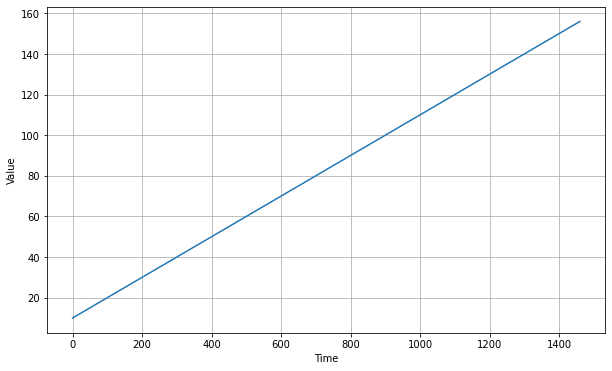

In [0]:
# Let's create a time series that just trends upward:
time = np.arange(4 * 365 + 1)
baseline = 10
series = baseline + trend(time, 0.1)

plt.figure(figsize = (10, 6))
plot_series(time, series)
plt.show()

In [0]:
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [0]:
series

array([ 10. ,  10.1,  10.2, ..., 155.8, 155.9, 156. ])

In [0]:
# Now let's generate a time series with a seasonal pattern:
def seasonal_pattern(season_time):
  """Just an arbitrary pattern, you can change it if you wish"""
  return np.where(season_time < 0.4,
                  np.cos(season_time * 2 * np.pi), 
                  1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude = 1, phase = 0):
  """Repeats the same pattern at each period"""
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)


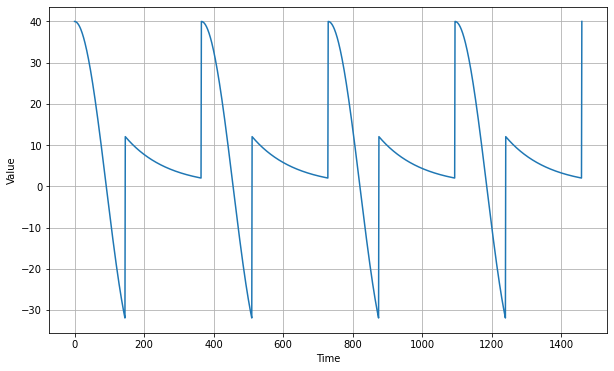

In [0]:
amplitude = 40
series = seasonality(time, period = 365, amplitude = amplitude)

plt.figure(figsize = (10, 6))
plot_series(time, series)
plt.show()

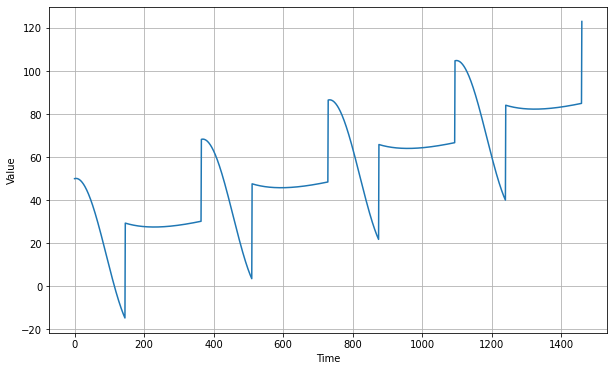

In [0]:
# Now let's create a time series with both trend and seasonality:
slop = 0.05
series = baseline + trend(time, slop) + seasonality(time, period = 365, amplitude = amplitude)

plt.figure(figsize = (10, 6))
plot_series(time, series)
plt.show()

# Noise

In [0]:
# In practice few real-life time series have such a smooth signal. They usually have some noise, and the signal-to-noise ratio can sometimes be very low. Let's generate some white noise:
def white_noise(time, noise_level = 1, seed = None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

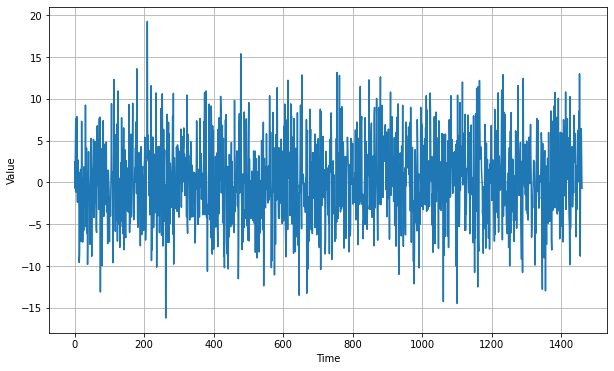

In [0]:
noise_level = 5
noise = white_noise(time, noise_level, seed = 42)

plt.figure(figsize = (10, 6))
plot_series(time, noise)
plt.show()

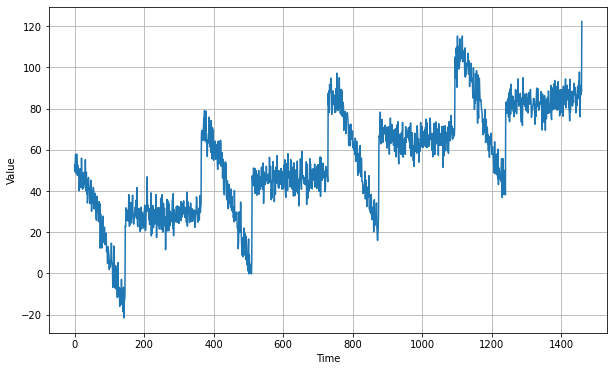

In [0]:
# Now let's add this white noise to the time series:
series += noise

plt.figure(figsize = (10, 6))
plot_series(time, series)
plt.show()

# Trend And Seasonality

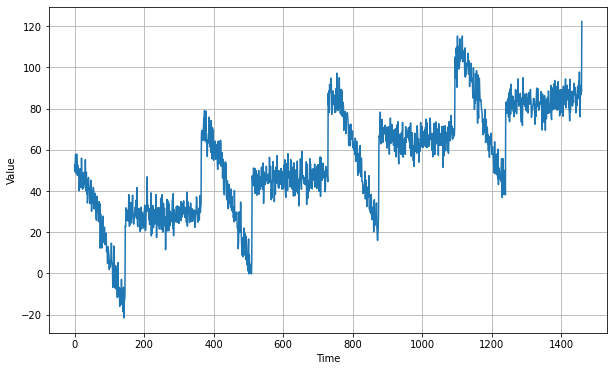

In [0]:
time = np.arange(4 * 365 + 1)

slope = 0.05
baseline = 10
amplitude = 40
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

noise_level = 5
noise = white_noise(time, noise_level, seed=42)

series += noise

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [0]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

# Naive Forecast

In [0]:
naive_forecast = series[split_time - 1:-1]

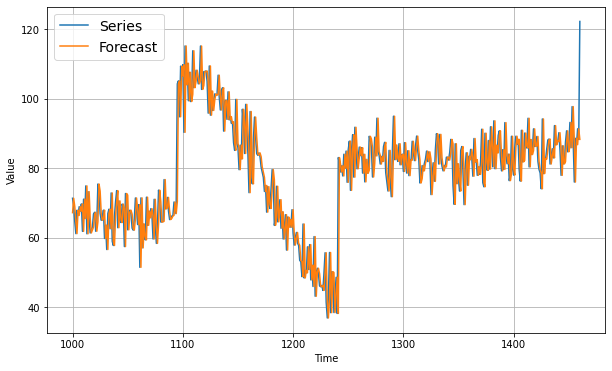

In [0]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, naive_forecast, label="Forecast")

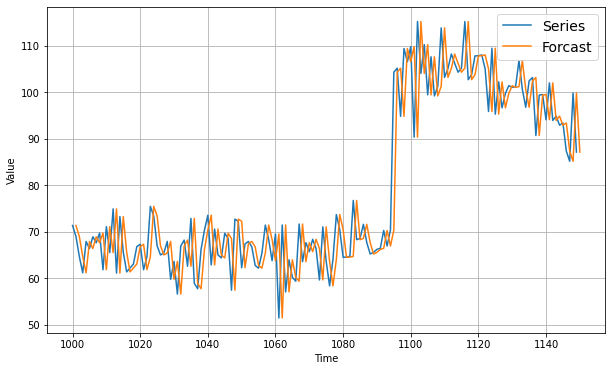

In [0]:
plt.figure(figsize = (10, 6))
plot_series(time_valid, x_valid, start = 0, end = 150, label = "Series")
plot_series(time_valid, naive_forecast, start = 1, end = 151, label = "Forcast")

In [0]:
errors = naive_forecast - x_valid
abs_errors = np.abs(errors)
mae = abs_errors.mean()
mae

5.9379085153216735